### MATLAB Reader & Feature Map

Sets up the extractor and Bottom-Track (BT) preprocessor, declares transect .mat paths and feature map, and populates processed_data with per-transect ensemble-mean matrices and scalar fields. 

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np

def process_flow_rate(file_path, feature_name, field_name, matrix_field=True, max_time_steps=181, preprocess=None):
    """
    Load and process a flow rate .mat file to extract data for the specified field in a feature.
    Args:
        file_path (str): Path to the .mat file.
        feature_name (str): Name of the feature to extract (e.g., 'WaterTrack').
        field_name (str): Name of the field within the feature (e.g., 'Vel_StdDev').
        matrix_field (bool): Whether the field is a matrix requiring mean calculation.
        max_time_steps (int): Maximum number of time steps to return.
        preprocess (callable): Optional preprocessing function to apply to the field data.
    Returns:
        np.ndarray: Extracted values for the specified field (processed if matrix_field=True).
    """
    try:
        # Load the MATLAB file
        matlab_data = loadmat(file_path, struct_as_record=False, squeeze_me=True)
        
        # Extract the feature data
        struct_data = matlab_data[feature_name]
        field_data = getattr(struct_data, field_name)  # Dynamically access the field
        
        if preprocess is not None:
            # Apply preprocessing function if provided
            field_data = preprocess(field_data)
        
        if matrix_field:
            # Compute mean values for each time step (if it's a matrix)
            processed_data = np.nanmean(field_data, axis=(0, 1))  # Mean over rows and columns
        else:
            # Directly use the field data if it's scalar
            processed_data = field_data
        
        return processed_data[:max_time_steps]  # Limit to max_time_steps if necessary
    
    except Exception as e:
        print(f"Error processing {file_path} ({field_name}): {e}")
        return None

# Define preprocessing function for Bottom Track Velocity
def preprocess_bottom_track(data):
    # Replace negative values with zero
    data[data < 0] = 0
    # Compute the average of the four columns
    averaged_data = np.nanmean(data, axis=1)  # Average across columns
    return averaged_data



# Define file paths for the field data
file_paths = {
    # January 2023 Data
    'Transect_01_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20230118103246.mat',
    'Transect_02_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20230118104553.mat',
    'Transect_03_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20230118105035.mat',
    'Transect_04_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20230118105343.mat',
    'Transect_05_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20230118105633.mat',
    'Transect_06_20230118': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20230118110009.mat',

    # June 2023 Data
    'Transect_01_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20230607123907.mat',
    'Transect_02_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20230607125347.mat',
    'Transect_03_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20230607125734.mat',
    'Transect_04_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20230607130155.mat',
    'Transect_05_20230607': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20230607130606.mat',

    # August 2023 Data
    'Transect_01_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_202308190806.mat',
    'Transect_02_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_202308191441.mat',
    'Transect_03_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_202308191758.mat',
    'Transect_04_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_202308192055.mat',
    'Transect_05_20230819': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_202308192351.mat',

    # August 2023 (Second Dataset)
    'Transect_01_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_2023082916300.mat',
    'Transect_02_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_2023082916347.mat',
    'Transect_03_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20230829163132.mat',
    'Transect_04_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20230829164057.mat',
    'Transect_05_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20230829165037.mat',
    'Transect_06_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20230829170426.mat',
    'Transect_07_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\07-Transect_20230829171342.mat',
    'Transect_08_20230829': r'C:\Users\thtuh\Documents\MATLAB\field\08-Transect_20230829172530.mat',

    # October 2023 Data
    'Transect_01_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20231027121112.mat',
    'Transect_02_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20231027122752.mat',
    'Transect_03_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20231027123056.mat',
    'Transect_04_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20231027123404.mat',
    'Transect_05_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20231027123719.mat',
    'Transect_06_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20231027124040.mat',
    'Transect_07_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\07-Transect_20231027124401.mat',
    'Transect_08_20231027': r'C:\Users\thtuh\Documents\MATLAB\field\08-Transect_20231027124713.mat',

    # December 2023 Data
    'Transect_01_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20231211093536.mat',
    'Transect_02_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20231211093916.mat',
    'Transect_03_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20231211094331.mat',
    'Transect_04_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20231211094620.mat',
    'Transect_05_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20231211094909.mat',
    'Transect_06_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20231211095515.mat',
    'Transect_07_20231211': r'C:\Users\thtuh\Documents\MATLAB\field\07-Transect_20231211095900.mat',

    # January 2024 Data
    'Transect_01_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\01-Transect_20240103121207.mat',
    'Transect_02_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\02-Transect_20240103121450.mat',
    'Transect_03_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\03-Transect_20240103121651.mat',
    'Transect_04_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\04-Transect_20240103121856.mat',
    'Transect_05_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\05-Transect_20240103122100.mat',
    'Transect_06_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\06-Transect_20240103122302.mat',
    'Transect_07_20240103': r'C:\Users\thtuh\Documents\MATLAB\field\07-Transect_20240103122612.mat',
}


# Define features and their corresponding fields
features_to_extract = {
    'WaterTrack': {'matrix': ['Vel_StdDev', 'Correlation', 'Vel_Expected_StdDev']},  # Matrix-based features
    'Summary': {'scalar': ['Mean_Speed', 'Depth']},  # Scalar features
    'System': {'matrix': ['SNR'], 'scalar': ['Cell_Size', 'Cell_Start']},
    'BottomTrack': {'scaler': ['BT_Vel']}  # Bottom track velocity (requires preprocessing)
}


# Process each file for all features
processed_data = {}

for label, path in file_paths.items():
    processed_data[label] = {}
    for feature_name, field_groups in features_to_extract.items():
        for field_type, fields in field_groups.items():
            for field_name in fields:
                print(f"Processing {label} - {feature_name} ({field_name})...")
                
                # Apply preprocessing for BottomTrack > BT_Vel
                preprocess = preprocess_bottom_track if feature_name == 'BottomTrack' and field_name == 'BT_Vel' else None
                
                matrix_field = (field_type == 'matrix')  # Determine if it's matrix or scalar
                key = f"{feature_name}_{field_name}"  # Unique key for each feature-field combo
                processed_data[label][key] = process_flow_rate(path, feature_name, field_name, matrix_field, preprocess=preprocess)



Processing Transect_01_20230118 - WaterTrack (Vel_StdDev)...
Processing Transect_01_20230118 - WaterTrack (Correlation)...
Processing Transect_01_20230118 - WaterTrack (Vel_Expected_StdDev)...
Processing Transect_01_20230118 - Summary (Mean_Speed)...
Processing Transect_01_20230118 - Summary (Depth)...
Processing Transect_01_20230118 - System (SNR)...
Processing Transect_01_20230118 - System (Cell_Size)...
Processing Transect_01_20230118 - System (Cell_Start)...
Processing Transect_01_20230118 - BottomTrack (BT_Vel)...
Processing Transect_02_20230118 - WaterTrack (Vel_StdDev)...
Processing Transect_02_20230118 - WaterTrack (Correlation)...
Processing Transect_02_20230118 - WaterTrack (Vel_Expected_StdDev)...
Processing Transect_02_20230118 - Summary (Mean_Speed)...
Processing Transect_02_20230118 - Summary (Depth)...
Processing Transect_02_20230118 - System (SNR)...


C:\Users\thtuh\AppData\Local\Temp\ipykernel_8180\2699648799.py:32: RuntimeWarning: Mean of empty slice
  processed_data = np.nanmean(field_data, axis=(0, 1))  # Mean over rows and columns


Processing Transect_02_20230118 - System (Cell_Size)...
Processing Transect_02_20230118 - System (Cell_Start)...
Processing Transect_02_20230118 - BottomTrack (BT_Vel)...
Processing Transect_03_20230118 - WaterTrack (Vel_StdDev)...
Processing Transect_03_20230118 - WaterTrack (Correlation)...
Processing Transect_03_20230118 - WaterTrack (Vel_Expected_StdDev)...
Processing Transect_03_20230118 - Summary (Mean_Speed)...
Processing Transect_03_20230118 - Summary (Depth)...
Processing Transect_03_20230118 - System (SNR)...
Processing Transect_03_20230118 - System (Cell_Size)...
Processing Transect_03_20230118 - System (Cell_Start)...
Processing Transect_03_20230118 - BottomTrack (BT_Vel)...
Processing Transect_04_20230118 - WaterTrack (Vel_StdDev)...
Processing Transect_04_20230118 - WaterTrack (Correlation)...
Processing Transect_04_20230118 - WaterTrack (Vel_Expected_StdDev)...
Processing Transect_04_20230118 - Summary (Mean_Speed)...
Processing Transect_04_20230118 - Summary (Depth)...


### Build Field Dataset

Collates per-transect feature arrays into a tidy table (181 steps max), reorders columns, and exports to Excel.

In [2]:
# Initialize lists for DataFrame content
final_data = []
# List of features to check
features_to_check = ['BT_Vel', 'Depth', 'Vel_StdDev', 'Correlation','Mean_Speed', 'SNR', 'Vel_Expected_StdDev']
# Iterate through processed data for all transects and features
for label, features in processed_data.items():
    for i in range(181):  # Assuming each transect has up to 181 time steps
        row = {"Transect": label}  # Add the transect label (renamed from "Flow Rate")
        for key, values in features.items():
            if values is not None and len(values) > i:
                feature_name = key.split('_', 1)[1]  # Keep the full feature name after the first underscore
                row[feature_name] = values[i]
        final_data.append(row)

# Convert to DataFrame
final_df = pd.DataFrame(final_data)

# Reorder columns to place 'Transect' first
columns = ["Transect"] + [feature for feature in features_to_check]  # Ensure consistent column order
final_df = final_df[columns]  # Reorder columns

# Save DataFrame to an Excel file
output_path = r"C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_1.xlsx"  # Updated file name for field data
final_df.to_excel(output_path, index=False)
print(f"Data saved to {output_path}")

# Verify DataFrame contents
print(final_df.head())

Data saved to C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_1.xlsx
               Transect    BT_Vel     Depth  Vel_StdDev  Correlation  \
0  Transect_01_20230118  0.002594  0.630651         0.0    76.583333   
1  Transect_01_20230118  0.000000  0.625413         0.0    76.583333   
2  Transect_01_20230118  0.002833  0.619808         0.0    77.200000   
3  Transect_01_20230118  0.000784  0.617424         0.0    75.443510   
4  Transect_01_20230118  0.002963  0.613901         0.0    76.750000   

   Mean_Speed        SNR  Vel_Expected_StdDev  
0    0.176239  36.506061             0.000765  
1    0.149039  37.350000             0.000746  
2    0.172903  36.171875             0.000753  
3    0.155965  13.624772             0.006910  
4    0.151861  36.903333             0.000780  


### Build Final Field Dataset With ABS

Collates per-transect ensembles into a tidy table, derives **Bin_Distance** and **Relative_ABS** (range-corrected backscatter; α = 0.07), reorders columns, and exports to Excel.

In [3]:
# Initialize lists for DataFrame content
final_data = []

# Acoustic attenuation for ABS calculation
alpha = 0.07

# List of features to check (explicitly including Bin_Distance and Relative_ABS)
features_to_check = ['BT_Vel', 'Depth', 'Vel_StdDev', 'Correlation',
                     'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 
                     'Bin_Distance', 'Relative_ABS']

# Iterate through processed data for all transects and features
for label, features in processed_data.items():
    
    # Dynamically determine the smallest available data length (avoid empty iterable issue)
    num_steps = min((len(v) for v in features.values() if v is not None and len(v) > 0), default=0)

    if num_steps == 0:  # Skip this transect if no valid data exists
        print(f"Skipping {label} due to missing data.")
        continue  

    for i in range(num_steps):  # Dynamically adjusted loop length
        row = {"Transect": label}
        
        # Add existing features
        for key, values in features.items():
            if values is not None and len(values) > i:
                feature_name = key.split('_', 1)[1]
                row[feature_name] = values[i]
        
        # Explicitly calculate Bin Distance & Relative ABS (if available)
        if ('System_Cell_Start' in features and 
            'System_Cell_Size' in features and 
            'System_SNR' in features and
            len(features['System_Cell_Start']) > i and
            len(features['System_Cell_Size']) > i and
            len(features['System_SNR']) > i):
            
            bin_distance = features['System_Cell_Start'][i] + (features['System_Cell_Size'][i] / 2)
            row['Bin_Distance'] = bin_distance

            snr_value = features['System_SNR'][i]
            row['Relative_ABS'] = snr_value + 20 * np.log10(bin_distance) + 2 * alpha * bin_distance
        
        final_data.append(row)

# Convert to DataFrame
final_df = pd.DataFrame(final_data)

# Explicitly reorder columns
columns = ["Transect"] + [feature for feature in features_to_check if feature in final_df.columns]
final_df = final_df[columns]

# Save to Excel explicitly
output_path = r"C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_with_ABS.xlsx"
final_df.to_excel(output_path, index=False)

# Quick verification
print(final_df.head())
print(f"Data saved successfully to {output_path}")

Skipping Transect_02_20230607 due to missing data.
Skipping Transect_01_20230819 due to missing data.
Skipping Transect_02_20230819 due to missing data.
Skipping Transect_03_20230819 due to missing data.
Skipping Transect_04_20230819 due to missing data.
Skipping Transect_05_20230819 due to missing data.
Skipping Transect_01_20230829 due to missing data.
Skipping Transect_02_20230829 due to missing data.
               Transect    BT_Vel     Depth  Vel_StdDev  Correlation  \
0  Transect_01_20230118  0.002594  0.630651         0.0    76.583333   
1  Transect_01_20230118  0.000000  0.625413         0.0    76.583333   
2  Transect_01_20230118  0.002833  0.619808         0.0    77.200000   
3  Transect_01_20230118  0.000784  0.617424         0.0    75.443510   
4  Transect_01_20230118  0.002963  0.613901         0.0    76.750000   

   Mean_Speed        SNR  Vel_Expected_StdDev  Bin_Distance  Relative_ABS  
0    0.176239  36.506061             0.000765      0.143333     19.653044  
1    0.

### Feature Correlation Heatmap

Loads the dataset, defines core features, computes correlations, and draws a heatmap

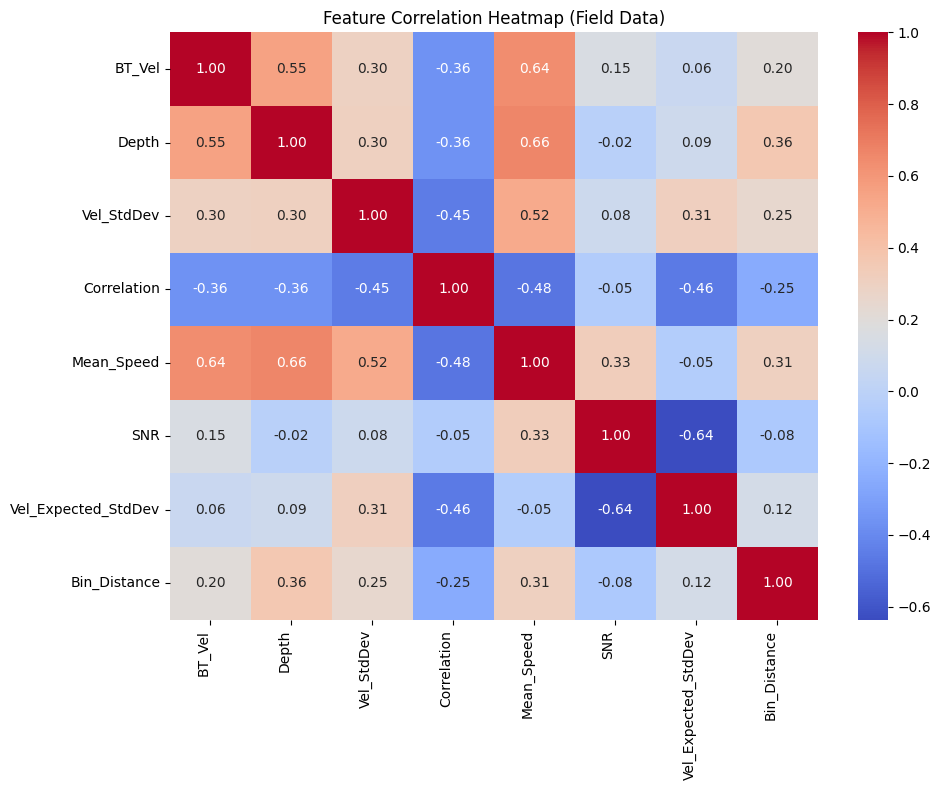

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed Excel file
input_path =  r"C:\Users\thtuh\Documents\Onedrive_personal\OneDrive\Personal _Github\ADCP_ML_DL_Journal_1\Processed_Field_Data_with_ABS.xlsx"
final_df.to_excel(output_path, index=False)
final_df = pd.read_excel(input_path)

# List of features to check (Modify this to add/remove features dynamically)
features_to_check = [
    'BT_Vel', 'Depth', 'Vel_StdDev', 'Correlation', 
    'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 
    'Bin_Distance'
]

# Ensure selected features exist in the DataFrame
available_features = [feature for feature in features_to_check if feature in final_df.columns]

# Exclude the 'Flow Rate' column and select only available features
features_only_df = final_df[available_features]

# Calculate the correlation matrix
correlation_matrix = features_only_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Feature Correlation Heatmap (Field Data)")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
